In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Derm\anaconda3\envs\tf23\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [8]:
# n trials on same set of 2 frames (sensor noise re-applied and initial conds randomized for each trial)

#part 1--------------------------
# with extended surface mitigation
fn1 = "MC_results/scene1_ICET_estimates_v5.npy" 
fn2 = "MC_results/scene1_ICET_pred_stds_v5.npy"
# v4 = 500 trials @ 5iter, v5 = 50 trials @ 10 iter, vj6 = 10 trials, noise ~0.05

# #no extended surface mitigation
# fn1 = "MC_results/scene1_ICET_estimates_NM_v4.npy" 
# fn2 = "MC_results/scene1_ICET_pred_stds_NM_v4.npy"
# #v3=500 trials with 5 iter, v4=500 trials with 
#---------------------------------

#part 2---------------------------
# with extended surface mitigation
# fn1 = "MC_results/scene2_ICET_estimates_v3.npy" 
# fn2 = "MC_results/scene2_ICET_pred_stds_v3.npy"
#v1 = 500, v2 = 50 test, v3 -= 500 (best)

# # #no extended surface mitigation
# fn1 = "MC_results/scene2_ICET_estimates_NM_v3.npy" 
# fn2 = "MC_results/scene2_ICET_pred_stds_NM_v3.npy"
#v1 = 500, v2 = 50 test, v3=500 (best)
#---------------------------------

# #part 3-------------------------
# # with extended surface mitigation
# # fn1 = "MC_results/scene3_ICET_estimates_v1.npy" 
# # fn2 = "MC_results/scene3_ICET_pred_stds_v1.npy"

# # # #no extended surface mitigation
# fn1 = "MC_results/scene3_ICET_estimates_NM_v1.npy" 
# fn2 = "MC_results/scene3_ICET_pred_stds_NM_v1.npy"
# #---------------------------------

est = np.load(fn1)
pred_stds = np.load(fn2)

print(np.mean(pred_stds, axis = 0)[:3])
print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))

# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

[0.00012433 0.00073712 0.00015195]
[0.00129316 0.00215245 0.00104748]


In [7]:
#remove outliers from est

# # #vertical axis
ok = np.where(abs(est[:,2]) < 0.0003)
est = est[ok]
# #roll
ok3 = np.where(abs(est[:,3]) < 0.000058)
est = est[ok3]
#pitch
ok4 = np.where(abs(est[:,4]) < 0.000067)
est = est[ok4]
# #yaw
# ok5 = np.where(abs(est[:,5]) < 0.0000476)
# est = est[ok5]

#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean, "\n")
std = np.std(est, axis = 0)
std[3:] = np.rad2deg(std[3:]) #convert angles to degrees
std += np.abs(mean) #add in any net offset

print(std)

[5.74920326e-04 6.37911260e-04 2.59071589e-04 1.40456766e-05
 1.23804512e-03 1.28141730e-03]


<IPython.core.display.Javascript object>


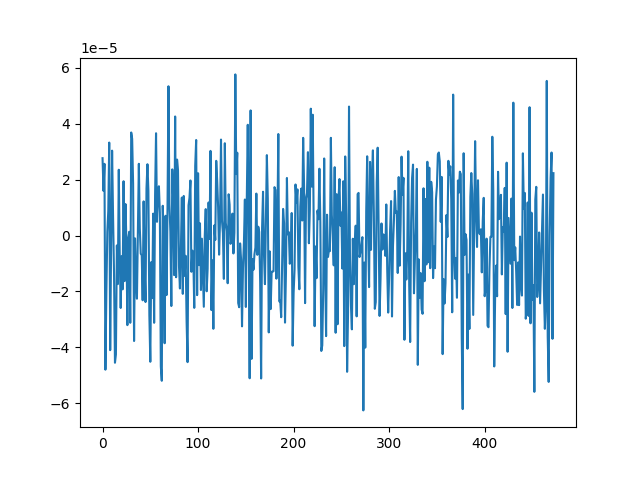

[0.10139305 0.10134819 0.00011618]
[1.23675739e-03 1.26952530e-03 1.73422724e+00]


In [4]:
#for debug - plot pred_stds to make sure we don't have any outlier trials
fig, ax = plt.subplots()

# ax.plot(pred_stds[:,2])

ax.plot(est[:,4]) 
# ax.plot(np.rad2deg(est[:,4]))

ok = np.where(abs(est[:,2]) < 0.0003)
# ok = np.where(abs(est[:,2]) < 0.1)

# print(ok)
print(np.std(est[ok], axis = 0)[:3])
print(np.rad2deg(np.std(est[ok], axis = 0))[3:])

In [5]:
bad = np.where(est[:,0] > -0.35)
print(bad)
print(est)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1